<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.215397,85.125661,45.335949,-0.000001,162.677006,162.677019,-1.262079e-05
1,0.0,1.0,73.499909,53.085895,28.620364,-0.000005,165.206163,165.206166,-3.028395e-06
2,0.0,2.0,35.548025,54.407353,65.989672,-0.000008,165.945043,165.945049,-6.914326e-06
3,0.0,3.0,61.821240,48.575886,22.407920,-0.000010,142.805036,142.805046,-1.019904e-05
4,0.0,4.0,53.950035,78.013617,97.221738,-0.000005,239.185386,239.185386,-3.492397e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.850919,20.593917,51.770165,-0.000006,169.214995,169.214995,6.053059e-07
249996,999.0,246.0,88.558556,52.526762,73.102615,0.000011,224.187944,224.187935,8.247028e-06
249997,999.0,247.0,64.215317,78.298823,95.273907,-0.000001,247.788046,247.788051,-5.542762e-06
249998,999.0,248.0,66.326435,48.626450,51.861044,-0.000008,176.813921,176.813924,-2.103838e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.215397,85.125661,45.335949,-0.000001,162.677006,162.677019,-1.262079e-05
1,0.0,1.0,73.499909,53.085895,28.620364,-0.000005,165.206163,165.206166,-3.028395e-06
2,0.0,2.0,35.548025,54.407353,65.989672,-0.000008,165.945043,165.945049,-6.914326e-06
3,0.0,3.0,61.821240,48.575886,22.407920,-0.000010,142.805036,142.805046,-1.019904e-05
4,0.0,4.0,53.950035,78.013617,97.221738,-0.000005,239.185386,239.185386,-3.492397e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.850919,20.593917,51.770165,-0.000006,169.214995,169.214995,6.053059e-07
249996,999.0,246.0,88.558556,52.526762,73.102615,0.000011,224.187944,224.187935,8.247028e-06
249997,999.0,247.0,64.215317,78.298823,95.273907,-0.000001,247.788046,247.788051,-5.542762e-06
249998,999.0,248.0,66.326435,48.626450,51.861044,-0.000008,176.813921,176.813924,-2.103838e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    22.215397  85.125661  ...  162.677019 -1.262079e-05
      1.0    73.499909  53.085895  ...  165.206166 -3.028395e-06
      2.0    35.548025  54.407353  ...  165.945049 -6.914326e-06
      3.0    61.821240  48.575886  ...  142.805046 -1.019904e-05
      4.0    53.950035  78.013617  ...  239.185386 -3.492397e-07
...                ...        ...  ...         ...           ...
999.0 245.0  86.850919  20.593917  ...  169.214995  6.053059e-07
      246.0  88.558556  52.526762  ...  224.187935  8.247028e-06
      247.0  64.215317  78.298823  ...  247.788051 -5.542762e-06
      248.0  66.326435  48.626450  ...  176.813924 -2.103838e-06
      249.0  85.331352  43.679430  ...  202.934719  9.976669e-06

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    22.215397  85.125661  ...  162.677019 -1.262079e-05
      1.0    73.499909  53.085895  ...  165.206166 -3.028395e-06
      2.0    35.548025  54.407353  ...  165.945049 -6.914326e-06
      3.0    61.821240  48.575886  ...  142.805046 -1.019904e-05
      4.0    53.950035  78.013617  ...  239.185386 -3.492397e-07
...                ...        ...  ...         ...           ...
999.0 245.0  86.850919  20.593917  ...  169.214995  6.053059e-07
      246.0  88.558556  52.526762  ...  224.187935  8.247028e-06
      247.0  64.215317  78.298823  ...  247.788051 -5.542762e-06
      248.0  66.326435  48.626450  ...  176.813924 -2.103838e-06
      249.0  85.331352  43.679430  ...  202.934719  9.976669e-06

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.215397,85.125661,45.335949,-0.000001,162.677006,162.677019,-1.262079e-05
1,0.0,1.0,73.499909,53.085895,28.620364,-0.000005,165.206163,165.206166,-3.028395e-06
2,0.0,2.0,35.548025,54.407353,65.989672,-0.000008,165.945043,165.945049,-6.914326e-06
3,0.0,3.0,61.821240,48.575886,22.407920,-0.000010,142.805036,142.805046,-1.019904e-05
4,0.0,4.0,53.950035,78.013617,97.221738,-0.000005,239.185386,239.185386,-3.492397e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.850919,20.593917,51.770165,-0.000006,169.214995,169.214995,6.053059e-07
249996,999.0,246.0,88.558556,52.526762,73.102615,0.000011,224.187944,224.187935,8.247028e-06
249997,999.0,247.0,64.215317,78.298823,95.273907,-0.000001,247.788046,247.788051,-5.542762e-06
249998,999.0,248.0,66.326435,48.626450,51.861044,-0.000008,176.813921,176.813924,-2.103838e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    22.215397  85.125661  ...  162.677019 -1.262079e-05
      1.0    73.499909  53.085895  ...  165.206166 -3.028395e-06
      2.0    35.548025  54.407353  ...  165.945049 -6.914326e-06
      3.0    61.821240  48.575886  ...  142.805046 -1.019904e-05
      4.0    53.950035  78.013617  ...  239.185386 -3.492397e-07
...                ...        ...  ...         ...           ...
999.0 245.0  86.850919  20.593917  ...  169.214995  6.053059e-07
      246.0  88.558556  52.526762  ...  224.187935  8.247028e-06
      247.0  64.215317  78.298823  ...  247.788051 -5.542762e-06
      248.0  66.326435  48.626450  ...  176.813924 -2.103838e-06
      249.0  85.331352  43.679430  ...  202.934719  9.976669e-06

[250000 rows x 7 columns]

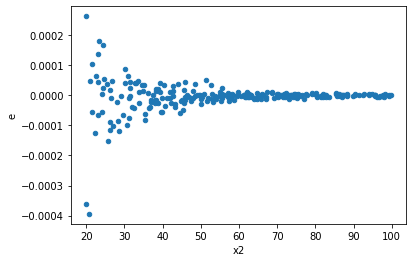

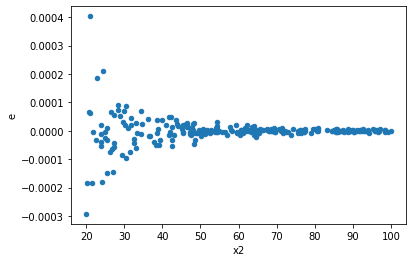

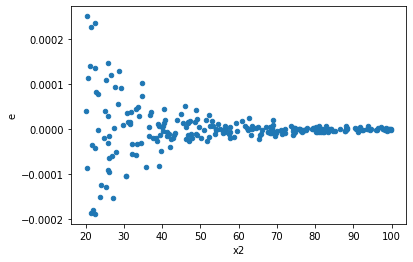

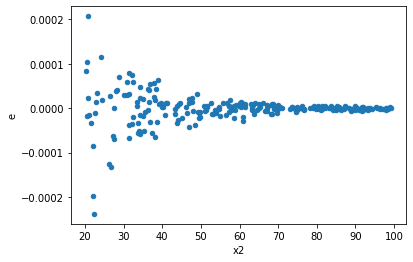

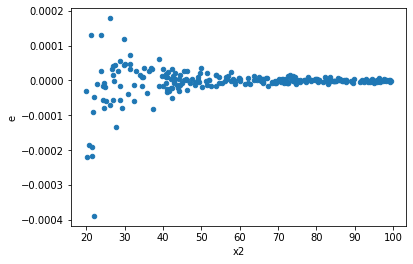

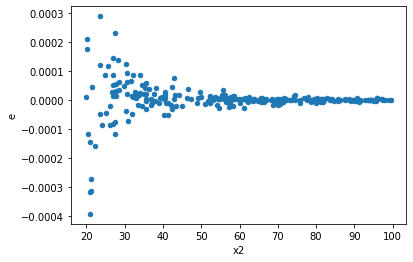

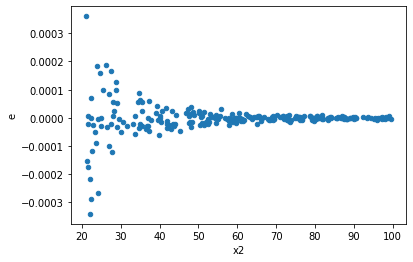

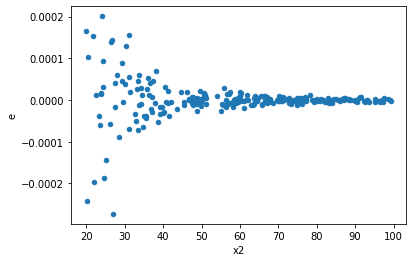

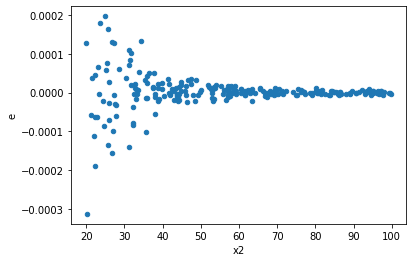

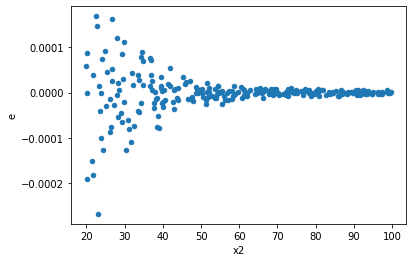

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,2.10179372847357e-09,3.7718577064892953e-07,2.1893684671599687e-11,3.929018444259683e-09,0.00557230386728942,3.636492607230372e-82,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2.084113844604625e-09,4.1186803851907966e-07,2.170951921463151e-11,4.29029206790708e-09,0.005060149488895286,3.5558480081287264e-84,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1.920126846050577e-09,4.695387060648663e-07,2.0001321313026843e-11,4.89102818817569e-09,0.004089389908114014,1.2715744082569873e-88,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.8539860983723256e-09,4.44005542524674e-07,1.9312355191378392e-11,4.625057734632021e-09,0.004175592241102029,3.46886473177379e-88,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1.6140935822304919e-09,4.977200056108153e-07,1.6813474814900958e-11,5.184583391779326e-09,0.003242975094500437,1.7966973751856424e-93,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,2.3965912429909127e-09,4.5702393277195795e-07,2.4964492114488675e-11,4.760665966374562e-09,0.0052439075311768064,1.9712625500026933e-83,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1.984702337150772e-09,9.874294573395409e-07,2.0673982678653874e-11,1.028572351395355e-08,0.002009968734878754,1.694915155386563e-103,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,1.7160148499642975e-09,3.3948393179862897e-07,1.78751546871281e-11,3.5362909562357183e-09,0.005054774878070468,3.378934308439749e-84,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1.954398426652884e-09,4.716426008375716e-07,2.0358316944300875e-11,4.912943758724704e-09,0.004143812334132126,2.4019856367565774e-88,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64